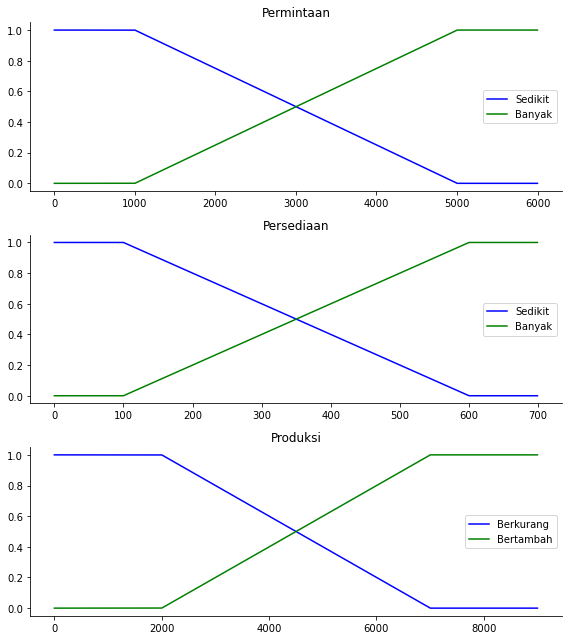

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline
# Generate universe variables

x_minta = np.arange(0, 6000, 1)
x_sedia = np.arange(0, 700, 1)
x_produksi  = np.arange(0, 9000, 1)

# Generate fuzzy membership functions
minta_sd = fuzz.trapmf(x_minta, [0, 0, 1000, 5000])
minta_by = fuzz.trapmf(x_minta, [1000, 5000, 6000, 6000])

sedia_sd = fuzz.trapmf(x_sedia, [0, 0, 100, 600])
sedia_by = fuzz.trapmf(x_sedia, [100, 600, 700, 700])

produksi_kr  = fuzz.trapmf(x_produksi, [0, 0, 2000, 7000])
produksi_tb  = fuzz.trapmf(x_produksi, [2000, 7000, 9000, 9000])


# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_minta, minta_sd, 'b', linewidth=1.5, label='Sedikit')
ax0.plot(x_minta, minta_by, 'g', linewidth=1.5, label='Banyak')

ax0.set_title('Permintaan')
ax0.legend()

ax1.plot(x_sedia, sedia_sd, 'b', linewidth=1.5, label='Sedikit')
ax1.plot(x_sedia, sedia_by, 'g', linewidth=1.5, label='Banyak')


ax1.set_title('Persediaan')
ax1.legend()

ax2.plot(x_produksi, produksi_kr, 'b', linewidth=1.5, label='Berkurang')
ax2.plot(x_produksi, produksi_tb, 'g', linewidth=1.5, label='Bertambah')

ax2.set_title('Produksi')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [9]:
##  Crisp Input
minta = 2000
sedia = 300

In [10]:
## Fuzzyfication #Tsukamoto
in1 = []
in1.append(fuzz.interp_membership(x_minta, minta_sd, minta))
in1.append(fuzz.interp_membership(x_minta, minta_by, minta))
in2 = []
in2.append(fuzz.interp_membership(x_sedia, sedia_sd, sedia))
in2.append(fuzz.interp_membership(x_sedia, sedia_by, sedia))

print("Derajat Kranggotaan Persediaan ")
if in1[0]>0 :
    print("Sedikit : "+str(in2[0]))
if in1[1]>0 :
    print("Banyak  : "+ str(in2[1]))

print("")
print("Derajat Kranggotaan Permintaan")
if in2[0]>0 :
    print("Sedikit : "+str(in1[0]))
if in2[1]>0 :
    print("Banyak  : "+ str(in1[1]))

Derajat Kranggotaan Persediaan 
Sedikit : 0.6
Banyak  : 0.4

Derajat Kranggotaan Permintaan
Sedikit : 0.75
Banyak  : 0.25


In [11]:
## Rules and Inferences Tsukamoto
# krg = 7000 - (active_rule3)*5000
# tbh = 5000*deg + 2000

apred1  = np.fmin(in1[1], in2[1])
z1      = 5000*apred1 + 2000

apred2  = np.fmin(in1[0], in2[0])
z2      = 7000-(apred2)*5000

apred3  = np.fmin(in1[0], in2[1])
z3      = 7000-(apred3)*5000

apred4  = np.fmin(in1[1], in2[0])
z4      = 5000*apred4 + 2000

print(z1,z2,z3,z4)
## Defazzyfication
z = (apred1*z1 + apred2*z2 + apred3*z3 + apred4*z4)/ (apred1 + apred2+ apred3 + apred4)
print("Barang yang harus di produksi : "+str(int(z)))

3250.0 4000.0 5000.0 3250.0
Barang yang harus di produksi : 4016


#### Another approach

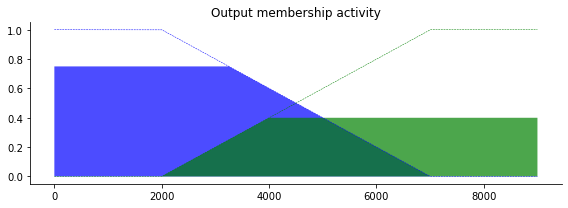

In [12]:
act_minta_sd  = fuzz.interp_membership(x_minta, minta_sd, minta)
act_minta_by  = fuzz.interp_membership(x_minta, minta_by, minta)

act_sedia_sd = fuzz.interp_membership(x_sedia, sedia_sd, sedia)
act_sedia_by = fuzz.interp_membership(x_sedia, sedia_by, sedia)


active_rule1 = np.fmax(act_minta_by, act_sedia_by)
act_produksi_tb = np.fmin(active_rule1, produksi_tb)

active_rule2 = np.fmax(act_minta_sd, act_sedia_sd)
act_produksi_kr = np.fmin(active_rule2, produksi_kr)

active_rule3 = np.fmax(act_minta_sd, act_sedia_by)
act_produksi_kr2 = np.fmin(active_rule3, produksi_kr)

active_rule4 = np.fmax(act_minta_by, act_sedia_sd)
act_produksi_tb2 = np.fmin(active_rule4, produksi_tb)

tip0 = np.zeros_like(x_produksi)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_produksi, tip0, act_produksi_kr, facecolor='b', alpha=0.7)
ax0.plot(x_produksi, produksi_kr, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_produksi, tip0, act_produksi_tb, facecolor='g', alpha=0.7)
ax0.plot(x_produksi, produksi_tb, 'g', linewidth=0.5, linestyle='--')
#ax0.fill_between(x_produksi, tip0, act_produksi_kr2, facecolor='r', alpha=0.7)
#ax0.fill_between(x_produksi, tip0, act_produksi_tb2, facecolor='grey', alpha=0.7)
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [13]:
# Aggregate all output membership functions together
aggregated = np.fmax(act_produksi_tb,
             np.fmax(act_produksi_kr, 
             np.fmax(act_produksi_kr2, act_produksi_tb2)))

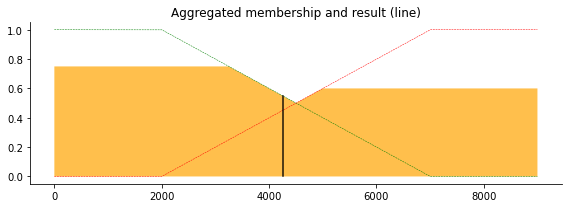

In [14]:
# Calculate defuzzified result
tip = fuzz.defuzz(x_produksi, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_produksi, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_produksi, produksi_kr, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_produksi, produksi_tb, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_produksi, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
